In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

## Part 1) Data Exploration and Evaluation

In [3]:
df_loan = pd.read_csv("lending-club-loan-data/loan.csv",low_memory=False)

In [4]:
df_loan.shape

(887379, 74)

In [6]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [5]:
# per instruction, only use these cols 
cols_keep = ['loan_amnt','funded_amnt','term','int_rate','grade',\
            'annual_inc','issue_d','dti','revol_bal','total_pymnt',\
            'loan_status']

In [7]:
df_loan = df_loan.loc[:,cols_keep]

In [8]:
df_loan.shape

(887379, 11)

In [9]:
# ==================================
# Column summaries
# ==================================
#data = train_df

def get_meta_data(data):
    # Define metrics to be determined for each column
    metrics = []
    metrics.append(data.dtypes)
    metrics.append(data.apply(lambda x: x.nunique(), axis=0))
    
    metrics.append(data.apply(lambda x: x.isnull().sum(), axis=0))

    metrics.append(data.apply(lambda x: (x==" ").sum(), axis=0))

    # Summarize
    data_meta = pd.concat(metrics, axis=1)
    data_meta.columns = ['data_type', 'count_unique', 'count_null', 
                         'count_blank']
    # we DO NOT WANT TO COUNG BLANK AS MISSING HERE
#     data_meta['ppn_missing'] = (data_meta['count_null'] + 
#                                 data_meta['count_missing_passive'] + 
#                                 data_meta['count_missing_confirmed'] + 
#                                 data_meta['count_blank']) / len(data)
    data_meta['ppn_missing'] = (data_meta['count_null'] 
                                ) / len(data)
    return data_meta

In [10]:
meta = get_meta_data(df_loan)

In [11]:
# look at column summaries - sumary statistics #1
meta

,data_type,count_unique,count_null,count_blank,ppn_missing
loan_amnt,float64,1372,0,0,0.000000
funded_amnt,float64,1372,0,0,0.000000
term,object,2,0,0,0.000000
int_rate,float64,542,0,0,0.000000
grade,object,7,0,0,0.000000
annual_inc,float64,49384,4,0,0.000005
issue_d,object,103,0,0,0.000000
dti,float64,4086,0,0,0.000000
revol_bal,float64,73740,0,0,0.000000
total_pymnt,float64,506726,0,0,0.000000


we don't have any missing values in the dataset except 
a small amount in annual income, let's explore the col first and 
then impute with k-means based imputation

We will also need to deal with data types for term, grade, and issue_d

In [36]:
# the annual income sneak-peek
df_loan.annual_inc.value_counts().head() 


60000.0    34281
50000.0    30575
65000.0    25498
70000.0    24121
40000.0    23943
Name: annual_inc, dtype: int64

In [17]:
# Method to impute missing values from continuous variables using k-means clustering
def kmeans_missing(X, n_clusters, max_iter=10):

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            cls = KMeans(n_clusters, n_init=1,n_jobs=-1)

        # Perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # Fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # When the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return X_hat

In [21]:
df_loan.loc[:,['annual_inc']] = kmeans_missing(df_loan.loc[:,['annual_inc']],n_clusters=10,max_iter=10) # this will only work for numerical columns!

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [22]:
meta = get_meta_data(df_loan)
meta

,data_type,count_unique,count_null,count_blank,ppn_missing
loan_amnt,float64,1372,0,0,0.0
funded_amnt,float64,1372,0,0,0.0
term,object,2,0,0,0.0
int_rate,float64,542,0,0,0.0
grade,object,7,0,0,0.0
annual_inc,float64,49385,0,0,0.0
issue_d,object,103,0,0,0.0
dti,float64,4086,0,0,0.0
revol_bal,float64,73740,0,0,0.0
total_pymnt,float64,506726,0,0,0.0


No more missing values now!

In [24]:
# deal with data types and explore data further
# term unique vals
df_loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [26]:
# loan grade unique vals
df_loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [27]:
# issue date convert to pandas daretime object
df_loan['issue_d']=pd.to_datetime(df_loan['issue_d'])

In [28]:
df_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [29]:
# convert to categorical where appropriate
cols_categorical = ['term','grade','loan_status']
for c in cols_categorical:
    df_loan[c] = df_loan[c].astype('category')

## EDA to better understand the distribution of features

In [30]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc',
       'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status'],
      dtype='object')

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

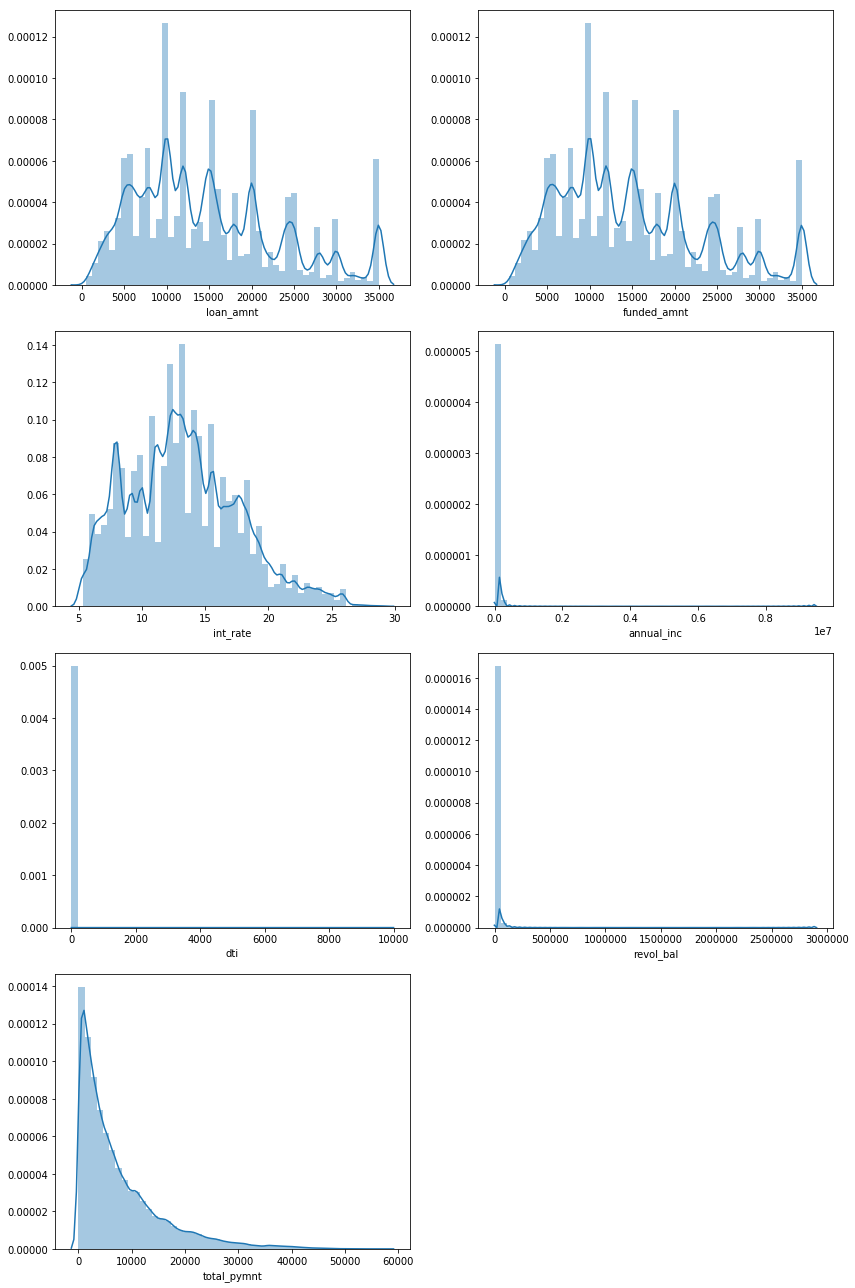

In [31]:
plot_cols = ['loan_amnt', 'funded_amnt','int_rate', 
            'annual_inc','dti', 'revol_bal', 'total_pymnt']

plt.figure(figsize=(12,18))
for i,c in enumerate(plot_cols):
    plt.subplot(4,2,i+1)
    sns.distplot(df_loan.loc[:,c])
    
plt.tight_layout()
plt.show()

loan_amnt seems normally distributed, but with a high spread, as well as funded_amnt, but seems the distribution is "normal enough" to use it for modeling later.

the annual income, dti and revol_bal are extremely skewed (for annual income in the US, this makes a lot of sense) so I will perform a log transformation of them for seeing the trends better and understanding what is going on.

total pymnt has a higher density of loans for which less total dollars was paid.

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


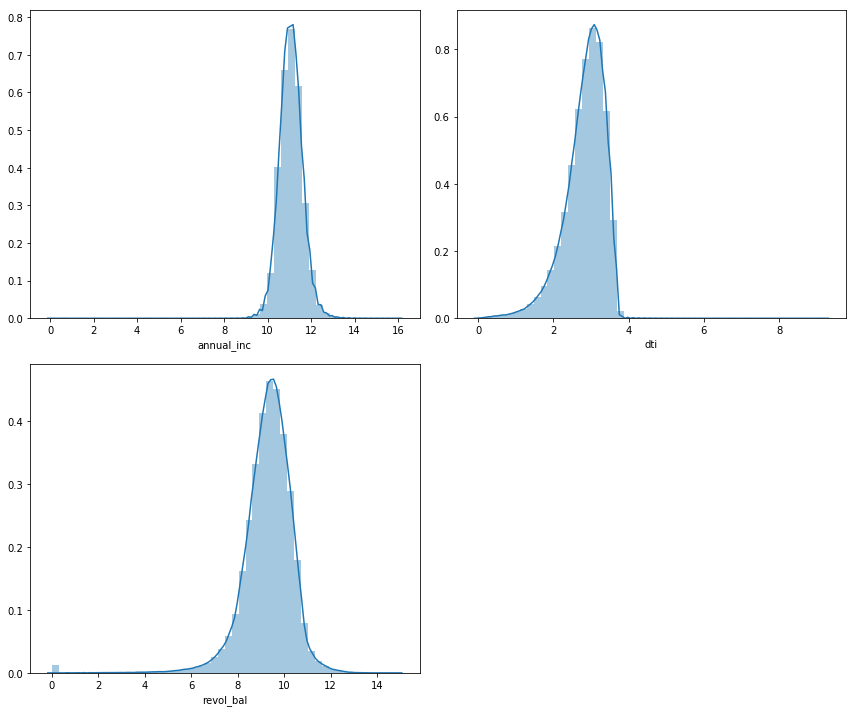

In [41]:
# convert
log_transform = ['annual_inc','dti', 'revol_bal']
plt.figure(figsize=(12,10))
for i,c in enumerate(log_transform):
    plt.subplot(2,2,i+1)
    sns.distplot(np.log(df_loan.loc[:,c]+1))
    
plt.tight_layout()
plt.show()

In [44]:
print(f'the median annual income is roughly: ${np.round(np.exp(11))}, the median dti ${np.round(np.exp(2.5))} and revolvling balance median is ${np.round(np.exp(9))}')

the median annual income is roughly: $59874.0, the median dti $12.0 and revolvling balance median is $8103.0


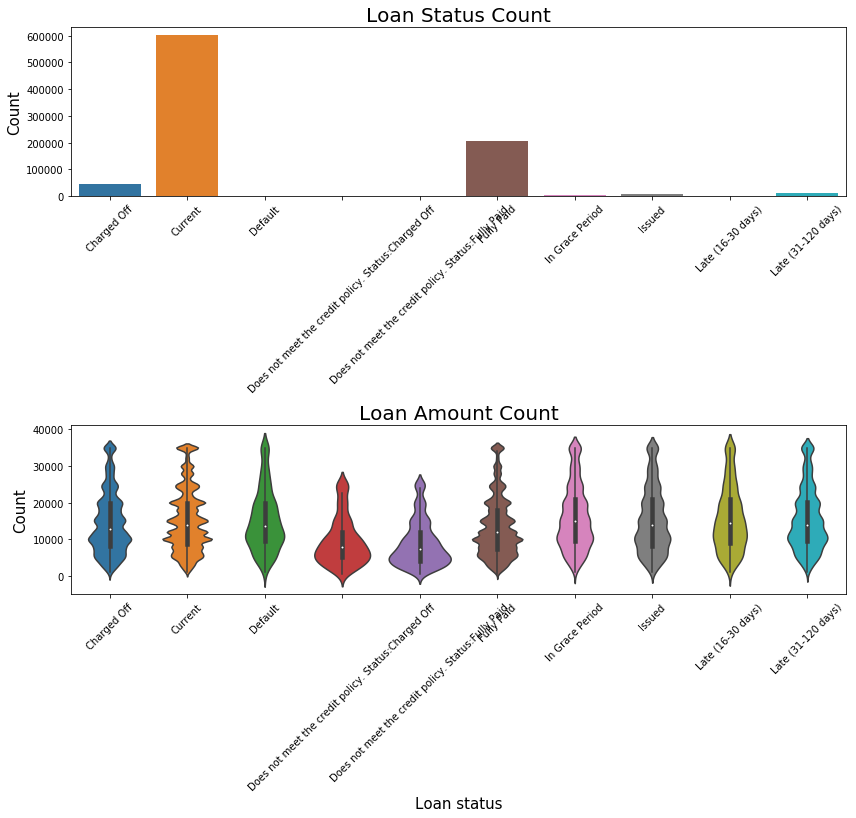

In [71]:
plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

plt.subplot(312)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df_loan)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan status", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount Count", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)
plt.tight_layout()
plt.show()

From the countplot above, we can clearly see that the majority of loans is 'current', with a small number of loans 
fully paid or charged off.

The count of loans divided into loan status buckets exhibits somewhat normally distributed patterns, and clearly for the 'subprime' loans, the average loan amount is smaller.

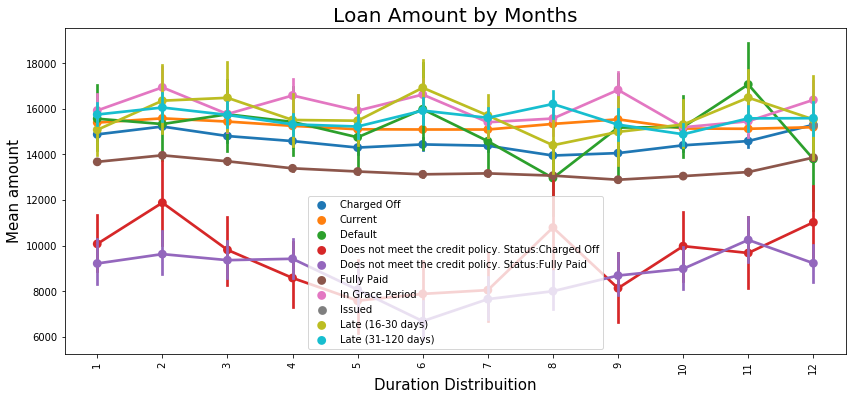

In [48]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_loan['issue_month'] = df_loan.issue_d.dt.month
#df_loan['issue_month'] = pd.Categorical(df_loan['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=df_loan, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

Above, we can see the distribution of mean loan amount by months in each category of loan status.

Not suprisingly, loans which do not meet credit policy have much lower average loan amount. Of note, combining with the plot above, keep in mind that majority of the loans in this dataset are actually 'current'

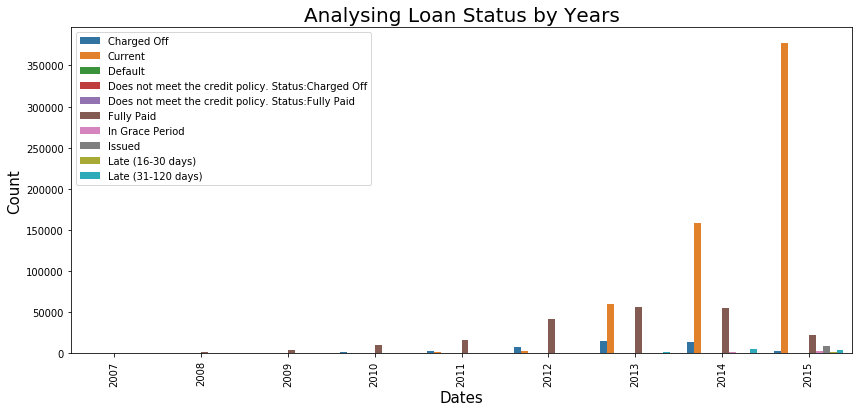

In [51]:
df_loan['issue_year'] = df_loan.issue_d.dt.year
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df_loan,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

We can see how the loans origination revived after 2008, and kept increasing, especially the 'current' loans

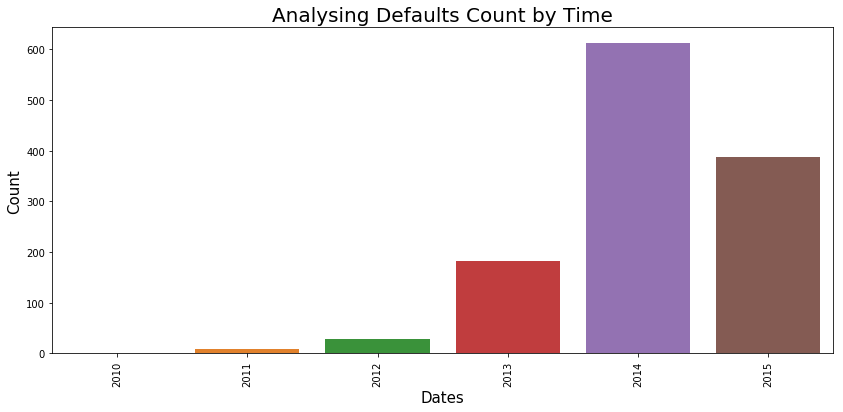

In [53]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is the month when the loan was funded
g = sns.countplot(x='issue_year', data=df_loan[df_loan['loan_status'] =='Default'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
#g.legend(loc='upper left')
g.set_title("Analysing Defaults Count by Time", fontsize=20)
plt.show()

Interestingly, in 2014 there was a peak in defaults on loans

## summary statistics for continuous cols



In [64]:
def get_summary_continuous(data):
    # Define metrics to be determined for each column
    metrics = []
    metrics.append(data.dtypes)
    metrics.append(data.apply(lambda x: x.nunique(), axis=0))
    
    metrics.append(data.apply(lambda x: x.isnull().sum(), axis=0))

    
    metrics.append(data.apply(lambda x: np.median(x), axis=0))
    
    metrics.append(data.apply(lambda x: np.percentile(x,25), axis=0))
    metrics.append(data.apply(lambda x: np.percentile(x,75), axis=0))
    metrics.append(data.apply(lambda x: np.std(x), axis=0))
    # Summarize
    data_meta = pd.concat(metrics, axis=1)
    data_meta.columns = ['data_type', 'count_unique', 'count_null' 
                        ,'median','25th percentile','75th percentile','std deviation']
    # we DO NOT WANT TO COUNG BLANK AS MISSING HERE
#     data_meta['ppn_missing'] = (data_meta['count_null'] + 
#                                 data_meta['count_missing_passive'] + 
#                                 data_meta['count_missing_confirmed'] + 
#                                 data_meta['count_blank']) / len(data)
    data_meta['ppn_missing'] = (data_meta['count_null'] 
                                ) / len(data)
    return data_meta

In [65]:
continuous = [col for col in df_loan.columns if df_loan[col].dtype in ['float64','int64']]

In [69]:
summary_continuous = get_summary_continuous(df_loan[list(set(continuous).difference(set(['issue_month','issue_year'])))])

In [70]:
summary_continuous 

,data_type,count_unique,count_null,median,25th percentile,75th percentile,std deviation,ppn_missing
annual_inc,float64,49385,0,65000.000000,45000.00,90000.000000,64698.118829,0.0
int_rate,float64,542,0,12.990000,9.99,16.200000,4.381865,0.0
dti,float64,4086,0,17.650000,11.91,23.950000,17.190616,0.0
loan_amnt,float64,1372,0,13000.000000,8000.00,20000.000000,8435.450848,0.0
total_pymnt,float64,506726,0,4894.999117,1914.59,10616.814231,7871.238901,0.0
funded_amnt,float64,1372,0,13000.000000,8000.00,20000.000000,8429.892907,0.0
revol_bal,float64,73740,0,11875.000000,6443.00,20829.000000,22426.779259,0.0


## summary statistics for categorical cols

In [72]:
def get_summary_categorical(data):
    # Define metrics to be determined for each column
    metrics = []
    metrics.append(data.dtypes)
    metrics.append(data.apply(lambda x: x.nunique(), axis=0))
    
    metrics.append(data.apply(lambda x: x.isnull().sum(), axis=0))

    
    metrics.append(data.apply(lambda x: np.count_nonzero(x), axis=0))
    
    # Summarize
    data_meta = pd.concat(metrics, axis=1)
    data_meta.columns = ['data_type', 'count_unique', 'count_null' 
                        ,'count']
    # we DO NOT WANT TO COUNG BLANK AS MISSING HERE
#     data_meta['ppn_missing'] = (data_meta['count_null'] + 
#                                 data_meta['count_missing_passive'] + 
#                                 data_meta['count_missing_confirmed'] + 
#                                 data_meta['count_blank']) / len(data)
    data_meta['ppn_missing'] = (data_meta['count_null'] 
                                ) / len(data)
    return data_meta

In [74]:
categorical = df_loan.columns.difference(continuous)

In [75]:
get_summary_categorical(df_loan[categorical])

,data_type,count_unique,count_null,count,ppn_missing
grade,category,7,0,887379,0.0
issue_d,datetime64[ns],103,0,887379,0.0
loan_status,category,10,0,887379,0.0
term,category,2,0,887379,0.0


# Part 2: Business Analysis

In [80]:
# we have 36 months and 60-months term loans

# for the purpose of this analysis, exlude the 60-months term loans

In [108]:
df_loan.term.unique()[0] # get rid of the empty space

'36 months'

In [109]:
df_loan.term = df_loan.term.apply(lambda x: x.strip(' '))

In [110]:
df_36 = df_loan.loc[df_loan.term=='36 months',:]

In [111]:
df_36.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issue_month,issue_year
0,5000.0,5000.0,36 months,10.65,B,24000.0,2011-12-01,27.65,13648.0,5861.071414,Fully Paid,12,2011
2,2400.0,2400.0,36 months,15.96,C,12252.0,2011-12-01,8.72,2956.0,3003.653644,Fully Paid,12,2011
3,10000.0,10000.0,36 months,13.49,C,49200.0,2011-12-01,20.00,5598.0,12226.302212,Fully Paid,12,2011
5,5000.0,5000.0,36 months,7.90,A,36000.0,2011-12-01,11.20,7963.0,5631.377753,Fully Paid,12,2011
7,3000.0,3000.0,36 months,18.64,E,48000.0,2011-12-01,5.35,8221.0,3938.144334,Fully Paid,12,2011


In [112]:
print(f'we have {df_36.shape[0]} of 36 months term loans available for analysis.')

we have 621125 of 36 months term loans available for analysis.


Exclude loans with less than 36 months of data available:

I look at the latest date in the dataset and assume that is the most 'current date'

Then I exlude loans which were issued after (maximum_date - 36 months) to get only loans with 36 months or more worth of data

In [113]:
cutoff_date = np.max(df_36.issue_d) - pd.Timedelta(weeks=36*4)
print(f'Exclude loans issued after {cutoff_date}')

Exclude loans issued after 2013-02-26 00:00:00


In [162]:
df_36 = df_36.loc[df_36.issue_d<=cutoff_date,:]

In [163]:
print(f'Latest loan with 36 months worth of data in current dataset issued on {loans_36_months_data.issue_d.max()}')

Latest loan with 36 months worth of data in current dataset issued on 2013-02-01 00:00:00


## 1) Percentage of 36-month term loans fully paid

In [164]:
print(f'Percentage of loans fully paid: {np.round(df_36.loan_status[df_36.loan_status=="Fully Paid"].count()/df_36.loan_status.count(),3)*100}%')

Percentage of loans fully paid: 81.5%


We have about 81.5% of 36 months term loans were fully paid after their 36-months term expired. 

## 2) When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here you may assume that any loan which was not fully paid had “defaulted”.

In [165]:
def default_rate(x):
    defaults = 0
    for i in x:
        if i != "Fully Paid":
            defaults+=1
    return defaults/len(x)

In [166]:
cohorts = df_36.groupby(['issue_year','grade']).agg({'loan_status': \
                                           lambda x: default_rate(x)}).sort_values(by='loan_status',ascending=False)

In [167]:
cohorts.head()

loan_status
issue_year grade             
2007       G         1.000000
2008       G         0.976744
2007       E         0.910000
           F         0.903846
2008       F         0.900901

Clearly, the 2007 and 2008 rate G cohorts defaulted almost in all cases... which makes a lot of sense given the Great Financial Crisis.

## 3 When bucketed by year of origination and grade, what annualized rate of return have these loans generated on average?
For simplicity, use the following approximation:
Annualized rate of return = (total_pymnt / funded_amnt) ^ (1/3) - 1

In [170]:
df_36.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc',
       'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status',
       'issue_month', 'issue_year'],
      dtype='object')

In [169]:
return_groupby = df_36.groupby(['issue_year','grade'])

In [189]:
def avg_annual_ror(return_groupby):
    result_dict = {}
    for i in return_groupby:
        # i[0] is the groupby label, i[1] dataframe for that label
        ror = (i[1]['total_pymnt']/i[1]['funded_amnt'])**(1/3)-1
        result_dict[i[0]] = ror.mean()
    return result_dict

In [192]:
pd.DataFrame.from_dict(avg_annual_ror(return_groupby))

ValueError: If using all scalar values, you must pass an index

In [172]:
return_groupby['total_pymnt','funded_amnt'].count()

total_pymnt  funded_amnt
issue_year grade                          
2007       A             78.0         78.0
           B             98.0         98.0
           C            141.0        141.0
           D             99.0         99.0
           E            100.0        100.0
           F             52.0         52.0
           G             35.0         35.0
2008       A            318.0        318.0
           B            594.0        594.0
           C            580.0        580.0
           D            419.0        419.0
           E            285.0        285.0
           F            111.0        111.0
           G             86.0         86.0
2009       A           1203.0       1203.0
           B           1445.0       1445.0
           C           1348.0       1348.0
           D            817.0        817.0
           E            308.0        308.0
           F            105.0        105.0
           G             55.0         55.0
2010       A           2567.0       2567.0
           B           2805.0       2805.0
           C           2070.0       2070.0
           D           1253.0       1253.0
           E            336.0        336.0
           F             91.0         91.0
           G             34.0         34.0
2011       A           5579.0       5579.0
           B           4722.0       4722.0
           C           2203.0       2203.0
           D           1261.0       1261.0
           E            272.0        272.0
           F             54.0         54.0
           G             10.0         10.0
2012       A          10753.0      10753.0
           B          16805.0      16805.0
           C           9902.0       9902.0
           D           5088.0       5088.0
           E            795.0        795.0
           F            103.0        103.0
           G             24.0         24.0
2013       A           1903.0       1903.0
           B           5019.0       5019.0
           C           2931.0       2931.0
           D           1440.0       1440.0
           E            225.0        225.0
           F             30.0         30.0
           G              NaN          NaN

In [185]:
for i in return_groupby:
    print(i[1].loc[:,['loan_amnt','loan_status']])
    

       loan_amnt                                        loan_status
39537     2000.0                                        Charged Off
39538     2800.0                                         Fully Paid
39539     8000.0                                         Fully Paid
39545     1000.0                                         Fully Paid
39551     5800.0                                         Fully Paid
39564     4000.0                                         Fully Paid
39572    15000.0                                         Fully Paid
39587     7000.0                                         Fully Paid
39607     6500.0                                         Fully Paid
39608     3000.0                                         Fully Paid
39613      500.0                                         Fully Paid
39618     5750.0                                         Fully Paid
39625     6000.0                                         Fully Paid
39627     4800.0                                

        loan_amnt  loan_status
176296     4500.0   Fully Paid
176404    10000.0   Fully Paid
176454     8000.0   Fully Paid
176498    15000.0   Fully Paid
176557     6325.0   Fully Paid
176561    10000.0   Fully Paid
176566     5500.0   Fully Paid
176588     8000.0   Fully Paid
176600    15000.0  Charged Off
176657    13000.0  Charged Off
176685    10000.0   Fully Paid
176691     8000.0  Charged Off
176719     6000.0   Fully Paid
176830     9750.0   Fully Paid
176838     9000.0   Fully Paid
176840     5000.0   Fully Paid
176843     2000.0   Fully Paid
176848    15000.0   Fully Paid
176855    15000.0      Current
176879    15000.0   Fully Paid
176923     7500.0   Fully Paid
176936     6000.0   Fully Paid
176948     3000.0   Fully Paid
176952     6000.0  Charged Off
176953    10500.0   Fully Paid
176956    16000.0   Fully Paid
176981     3000.0   Fully Paid
177004     6000.0   Fully Paid
177010    27000.0   Fully Paid
177019     1200.0   Fully Paid
...           ...          ...
230151  